## Task 1


## Loading and Inspection of Data

### Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Inspect the data

In [4]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

## Preprocessing of the Data

### Check for missing values

In [5]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Remove duplicates

In [6]:
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


### Checking data types

In [ ]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


## Merging Data

In [10]:
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

## EDA (Exploratory Data Analysis):

### Total sales by region


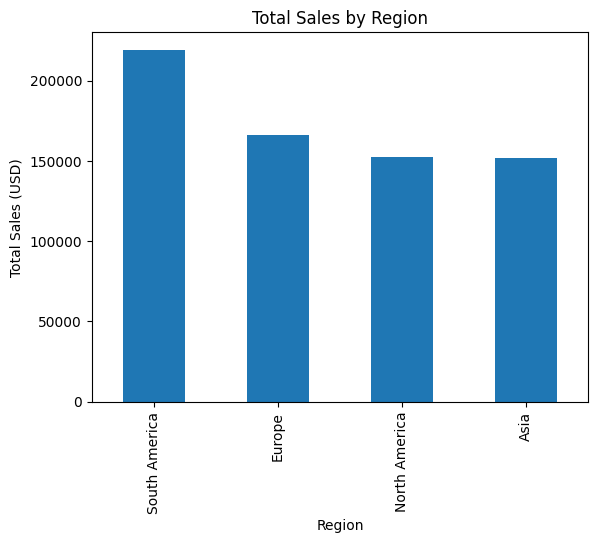

In [11]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
sales_by_region.plot(kind='bar', title='Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

### Monthly transaction trends

C:\Users\vineeth\AppData\Local\Temp\ipykernel_23008\1534246768.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = merged_data.resample('M', on='TransactionDate')['TransactionID'].count()


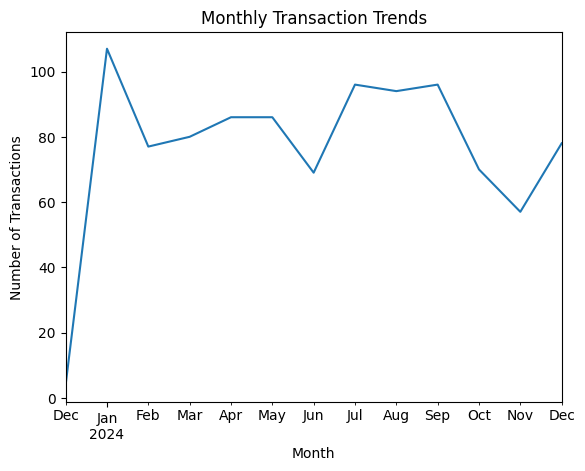

In [13]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
monthly_transactions = merged_data.resample('M', on='TransactionDate')['TransactionID'].count()
monthly_transactions.plot(title='Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

### Top product categories

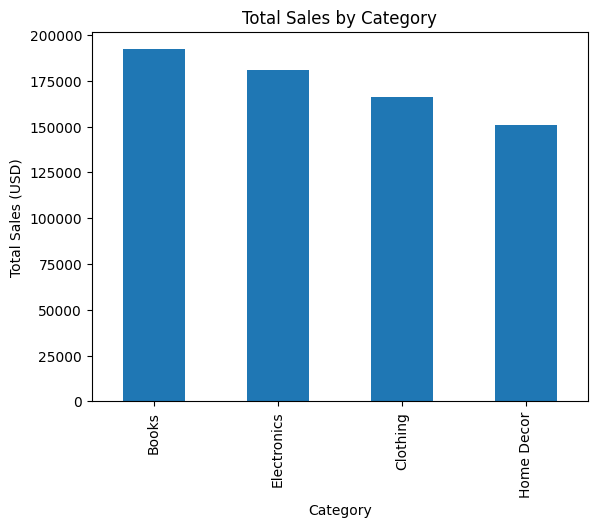

In [14]:
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
sales_by_category.plot(kind='bar', title='Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

### High-value customers

In [15]:
customer_spending = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top_10_percent = int(len(customer_spending) * 0.1)
high_value_customers = customer_spending.head(top_10_percent)
print(f'Top 10% of customers contribute to {high_value_customers.sum() / customer_spending.sum() * 100:.2f}% of total sales.')

Top 10% of customers contribute to 19.11% of total sales.


### Price distribution

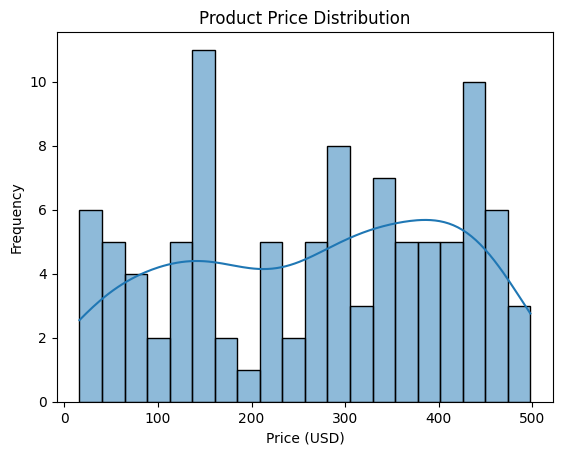

In [16]:
sns.histplot(products['Price'], bins=20, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

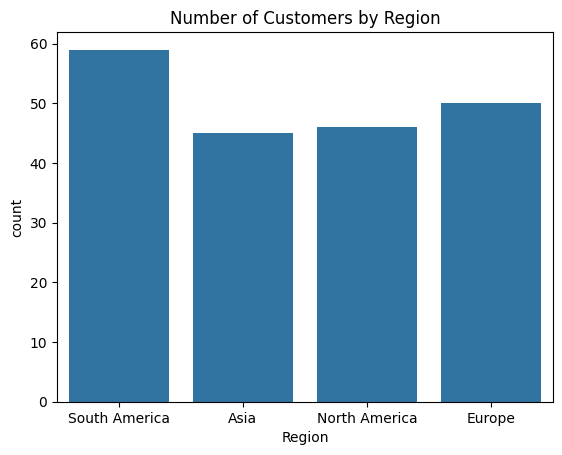

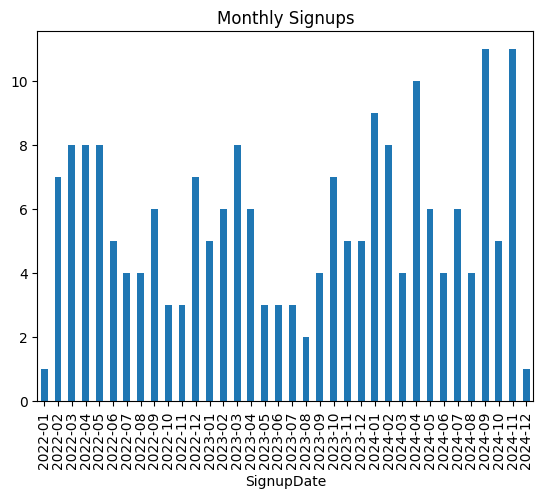

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot customers by region
sns.countplot(data=customers, x='Region')
plt.title("Number of Customers by Region")
plt.show()

# Signups over time
customers['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title("Monthly Signups")
plt.show()
